<a href="https://colab.research.google.com/github/cthitch137/PHYS250/blob/main/Collin_Hitchcock_Lab08_part2_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pyplot and numpy
import numpy as np
import matplotlib.pyplot as plt

# import fft and ifft from numpy.fft
from numpy.fft import fft, ifft, rfft
from cmath import exp,pi

# Part 1: Code Your Own FFT

(5 points)

Using the slides from class, implement your own version of the discrete fourier transform.




In [2]:
# your function here
def dft(y):
  """
  PARAMETERS
  y: array giving amplitude at evenly spaced time intervals

  RETURN
  c: fourier coefficients

  """
  # you can copy code from the slides
  N = len(y)

  c = np.zeros(N//2+1, complex)

  for n in range(N//2+1):
    for m in range(N):
      c[n] += y[m] * exp(-2j * pi * m * n/N)

  return c


Rebuild your composite cosine wave from the first part of the lab, and feed the amplitude into your dft function.  Compare your results with those from the `numpy.fft.fft` function.

[2.  1.  0.5]


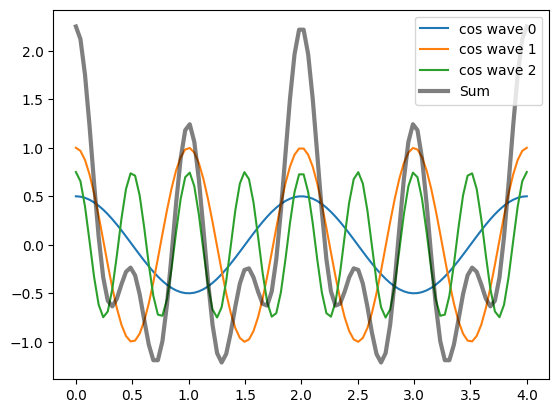

In [3]:
# rebuild sum of 3 cosine waves here
om = np.array([np.pi,2*np.pi,4*np.pi])
Twave = 2*np.pi/om
print(Twave)
amp = [0.5,1,0.75]
phi = [np.pi/2,np.pi,3*np.pi/2]
phi = np.zeros(len(om))
t = np.linspace(0,4,100)
plt.figure()
sumwave = np.zeros(len(t))
for i,o in enumerate(om):
  y = amp[i]*np.cos(om[i]*t+phi[i])
  sumwave += y
  plt.plot(t,y,label=f"cos wave {i}")
plt.plot(t,sumwave,lw='3',color='k',ls='-',label='Sum',alpha=0.5)
plt.legend()

In [4]:
phi

array([0., 0., 0.])

In [5]:
# pass your y array into your dft function
dft(y)

array([ 7.50000000e-01+0.00000000e+00j,  7.61166329e-01+2.39206156e-02j,
        7.96851842e-01+5.01336685e-02j,  8.64781244e-01+8.17458955e-02j,
        9.83036284e-01+1.24186363e-01j,  1.19545451e+00+1.89341394e-01j,
        1.63232003e+00+3.11381698e-01j,  2.90889063e+00+6.50214092e-01j,
        3.61215007e+01+9.27442506e+00j, -2.95543288e+00-8.58632626e-01j,
       -1.31999210e+00-4.28891431e-01j, -8.10527278e-01-2.91807776e-01j,
       -5.64543090e-01-2.23518421e-01j, -4.20966952e-01-1.82168667e-01j,
       -3.27633052e-01-1.54172411e-01j, -2.62572376e-01-1.33787308e-01j,
       -2.14939974e-01-1.18164251e-01j, -1.78774099e-01-1.05726707e-01j,
       -1.50531372e-01-9.55301135e-02j, -1.27977031e-01-8.69731007e-02j,
       -1.09634279e-01-7.96539661e-02j, -9.44896920e-02-7.32937181e-02j,
       -8.18258529e-02-6.76922325e-02j, -7.11214563e-02-6.27019982e-02j,
       -6.19891908e-02-5.82117249e-02j, -5.41357411e-02-5.41357411e-02j,
       -4.73352513e-02-5.04069229e-02j, -4.14112582

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


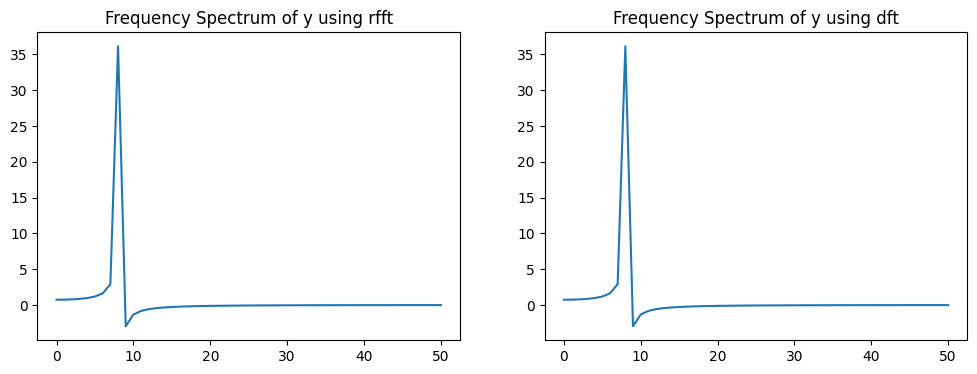

In [6]:
# compare the output from your function with the output from np.fft.fft
# plot the frequency spectrum for both
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title("Frequency Spectrum of y using rfft")
plt.plot(rfft(y))

plt.subplot(1,2,2)
plt.title("Frequency Spectrum of y using dft")
plt.plot(dft(y))

In [7]:
# time how long it takes the dft function to run
%time dft(sumwave)

CPU times: user 22.8 ms, sys: 0 ns, total: 22.8 ms
Wall time: 31.5 ms


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

In [8]:
# time how long it takes the fft fuction to run
%time fft(sumwave)

CPU times: user 76 µs, sys: 0 ns, total: 76 µs
Wall time: 81.5 µs


array([ 2.25000000e+00+0.00000000e+00j,  2.48755810e+00+7.81746625e-02j,
        2.71774728e+01+1.70986166e+00j,  2.66790128e+00+2.52190922e-01j,
        5.05375432e+01+6.38437642e+00j, -7.51465724e-01-1.19020478e-01j,
        7.59728738e-01+1.44926008e-01j,  2.38131144e+00+5.32286170e-01j,
        3.57607549e+01+9.18180127e+00j, -3.21965085e+00-9.35395042e-01j,
       -1.52229082e+00-4.94622272e-01j, -9.70319279e-01-3.49336436e-01j,
       -6.93708172e-01-2.74658495e-01j, -5.27245463e-01-2.28159486e-01j,
       -4.16313647e-01-1.95902332e-01j, -3.37406280e-01-1.71917087e-01j,
       -2.78669792e-01-1.53200014e-01j, -2.33456032e-01-1.38065512e-01j,
       -1.97740073e-01-1.25489666e-01j, -1.68940534e-01-1.14811869e-01j,
       -1.45325568e-01-1.05585206e-01j, -1.25690472e-01-9.74955236e-02j,
       -1.09171956e-01-9.03148968e-02j, -9.51358237e-02-8.38735110e-02j,
       -8.31062381e-02-7.80419522e-02j, -7.27196506e-02-7.27196506e-02j,
       -6.36938934e-02-6.78271073e-02j, -5.58069216

# Part 2: The Inverse Fourier Transform

(5 points)

Take the `fft` and then the `ifft` of your summed cosine wave.

```
Y = fft(sumwave)
ynew = ifft(Y)
```

Compare the output of the `ifft` (ynew) with the original wave (sumwave). To do this, plot both waves on the same plot.  Plot the original with a solid line and the recreated wave with black circles.  Be sure to add a legend and lable your axes.

Here is my result for comparison:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p2.png" width=300 >

In [9]:
# your code here
sumwave_fft = fft(sumwave)
sumwave_ifft = ifft(sumwave_fft)

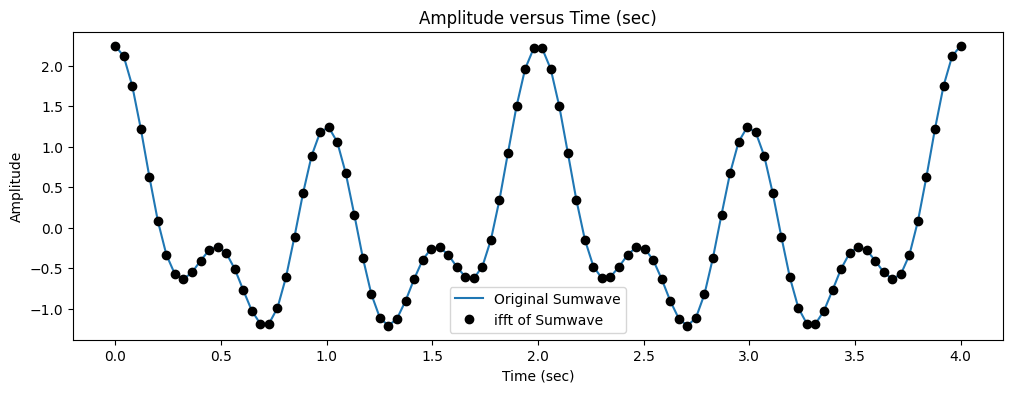

In [10]:
# your plot here
plt.figure(figsize=(12,4))

plt.plot(t,sumwave, label="Original Sumwave")
plt.plot(t,sumwave_ifft,'ko',label="ifft of Sumwave")

plt.title('Amplitude versus Time (sec)')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')
plt.legend()

# Part 3: Filter out noise from an audio signal

(5 points)

Make a program that will filter out noise from an audio signal.  
* To do this, you should construct a sine or cosine function, with a frequency of 1 Hz.

* Add two additional cosine functions with a frequency that are 10 and 15 times higher and an amplitude that is 10 and 15 times lower.

* We will consider the high frequency waves to be noise.

* Make a function called `filter_noise` that takes the input wave and returns the cleaned function

Here is the wave I made:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3a.png" width=300 >


Here is the a figure showing the Fourier components of the original and cleaned signal:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3b.png" width=300 >

Here is my input and cleaned signals:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p3c.png" width=300 >

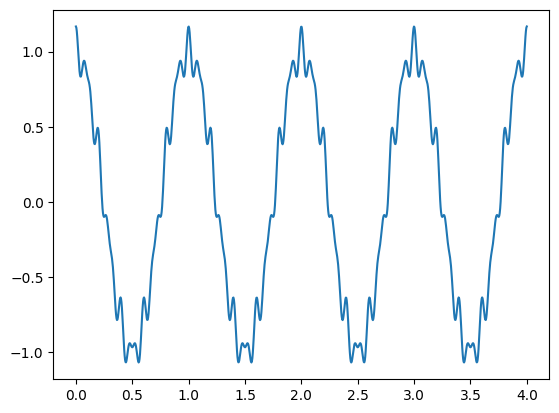

In [11]:
t = np.linspace(0,4,1000)
f = 1
cos1 = np.cos(2*pi*f*t)
cos2 = 1/10 * np.cos(2*np.pi*10*t)
cos3 = 1/15 * np.cos(2*np.pi*15*t)
sumwave = cos1+cos2+cos3
plt.plot(t,sumwave)

In [12]:
def filter_noise(y,t,fmax=10):
  # take the fft
  y_fft = rfft(y)
  n=len(t)
  TMAX = (t[1]-t[0])*(n-1)
  df = 1/TMAX # this is the lowest frequency we can sample

  frequency=np.arange(int(n/2)+1)*df
  # filter noise - any frequencies above fmax
  for i in range(len(frequency)):
    if frequency[i] >= fmax:
      y_fft[i] = 0
  # take the ifft of the filtered wave
  yfiltered = np.fft.irfft(y_fft)
  # return results
  return yfiltered

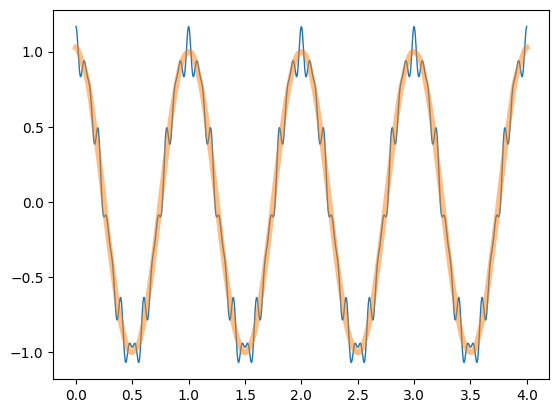

In [13]:
yfiltered= filter_noise(sumwave, t)

plt.plot(t,sumwave, lw = 1)
plt.plot(t,yfiltered,lw=4, alpha=0.5)

# Part 4: Read in wav file and analyze it

(10 points)

We'll explore how the different combinations of waves (called *overtones*) produces different timbres for different instruments.

First we'll listen to and then download some files of different instruments playing the same note: C4, which is the same as 262 Hz, for the dominant wave.

These .wav files come from [the University of Iowa musical instrument samples](https://www.ee.columbia.edu/~dpwe/sounds/instruments/).

In [14]:
from IPython.display import Audio,display

In [15]:
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav'
url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav'
#url='https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav'

Audio(url=url)

Now download the wav files for analysis.

In [16]:
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav -O pianoC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav -O trumpetC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/violin-C4.wav -O violinC4.wav
!wget https://www.ee.columbia.edu/~dpwe/sounds/instruments/flute-C4.wav -O fluteC4.wav

--2024-03-20 20:39:54--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/piano-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59544 (58K) [audio/x-wav]
Saving to: ‘pianoC4.wav’

pianoC4.wav         100%[===================>]  58.15K  --.-KB/s    in 0.001s  

2024-03-20 20:39:54 (85.9 MB/s) - ‘pianoC4.wav’ saved [59544/59544]

--2024-03-20 20:39:54--  https://www.ee.columbia.edu/~dpwe/sounds/instruments/trumpet-C4.wav
Resolving www.ee.columbia.edu (www.ee.columbia.edu)... 162.159.128.65, 162.159.138.64, 2606:4700:7::a29f:8041, ...
Connecting to www.ee.columbia.edu (www.ee.columbia.edu)|162.159.128.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172210 (168K) [audio/x-wav]
Saving to: ‘trumpetC4.wav’

trumpetC4.wav       100%[=============

### Reading in a wav file

There are many tools to read in wave files.  We will use `scipy.io.wavfile`, but also check out [`librosa`](https://librosa.org/doc/latest/index.html).

In [17]:
from scipy.io import wavfile


In [18]:
samplerate, signal = wavfile.read('violinC4.wav')

In [19]:
samplerate, signal = wavfile.read('violinC4.wav')
Audio(data=signal, rate=samplerate)


Text(0, 0.5, 'amplitude')

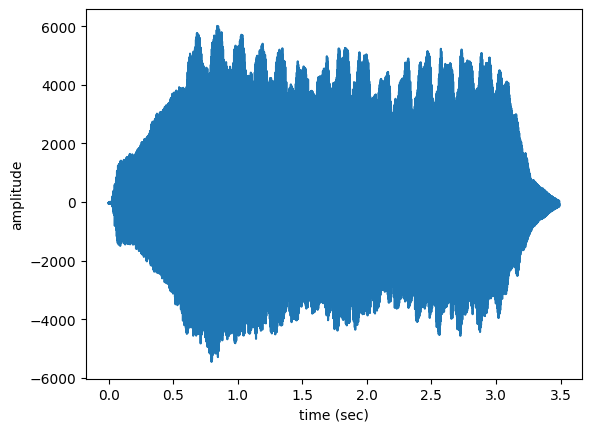

In [20]:
# here is an example of how to plot the violin data
N = len(signal)
T = 1/samplerate
t = N/samplerate # length of recording
t_array = np.arange(0,t,T)
plt.plot(t_array,signal)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

In [34]:
############
## VIOLIN ##
############
sampleratev, signalv = wavfile.read('violinC4.wav')
Nv = len(signalv)
Tv = 1/sampleratev
tv = Nv/sampleratev # length of recording
tv_array = np.arange(0,tv,Tv)

YV = fft(signalv)
TMAXv = (Tv)*(Nv-1)
dfv = 1/TMAXv # this is the lowest frequency we can sample
vfrequency=np.arange(int(Nv/2)+1)*dfv

###########
## PIANO ##
###########
sampleratep, signalp = wavfile.read('pianoC4.wav')
Np = len(signalp)
Tp = 1/sampleratep
tp = Np/sampleratep # length of recording
tp_array = np.arange(0,tp,Tp)

YP = fft(signalp)
TMAXp = (Tp)*(Np-1)
dfp = 1/TMAXp # this is the lowest frequency we can sample
pfrequency=np.arange(int(Np/2)+1)*dfp

#############
## TRUMPET ##
#############
sampleratet, signalt = wavfile.read('trumpetC4.wav')
Nt = len(signalt)
Tt = 1/sampleratet
tt = Nt/sampleratet # length of recording
tt_array = np.arange(0,tt,Tt)

YT = fft(signalt)
TMAXt = (Tt)*(Nt-1)
dft = 1/TMAXt # this is the lowest frequency we can sample
tfrequency=np.arange(int(Nt/2)+1)*dft

###########
## FLUTE ##
###########
sampleratef, signalf = wavfile.read('fluteC4.wav')
Nf = len(signalf)
Tf = 1/sampleratef
tf = Nf/sampleratef # length of recording
tf_array = np.arange(0,tf,Tf)

YF = fft(signalf)
TMAXf = (Tf)*(Nf-1)
dff = 1/TMAXf # this is the lowest frequency we can sample
ffrequency=np.arange(int(Nf/2)+1)*dff

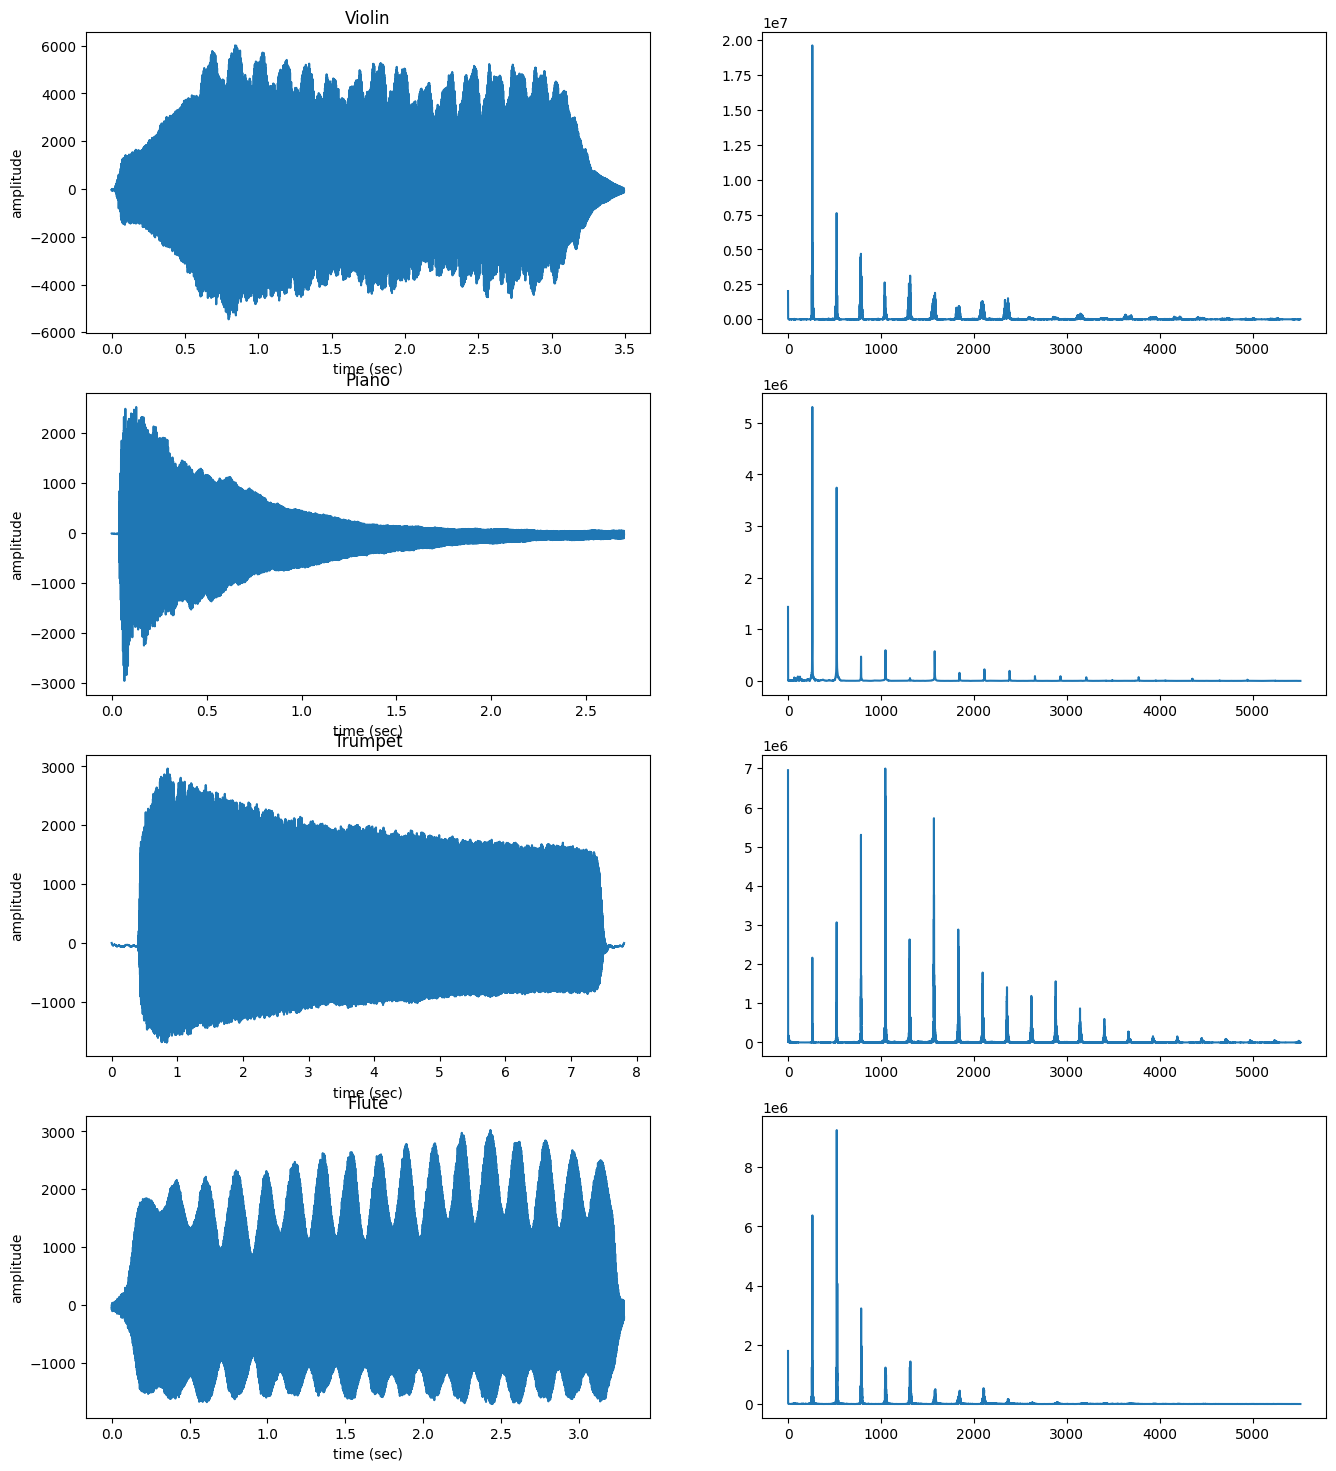

In [40]:
# compare all 4 audio files in one figure with 4 rows and 1 column
plt.figure(figsize=(16,18))

plt.subplot(4,2,1)
plt.title('Violin')
plt.plot(tv_array,signalv)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,2,2)
plt.plot(vfrequency[:Nv//2+1],np.abs(YV[:Nv//2+1]))

plt.subplot(4,2,3)
plt.title('Piano')
plt.plot(tp_array,signalp)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,2,4)
plt.plot(pfrequency[:Np//2+1],np.abs(YP[:Np//2+1]))

plt.subplot(4,2,5)
plt.title('Trumpet')
plt.plot(tt_array,signalt)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,2,6)
plt.plot(tfrequency[:Nt//2+1],np.abs(YT[:Nt//2+1]))

plt.subplot(4,2,7)
plt.title('Flute')
plt.plot(tf_array,signalf)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,2,8)
plt.plot(ffrequency[:Nf//2+1],np.abs(YF[:Nf//2+1]))

### Plot the fft output (power versus frequency) for all 4 instruments

Remember to just plot the first have of the output arrays:
```
plt.plot(frequency[:N//2+1],np.abs(Y[:N//2+1]))
````

Here are my results for the input signal and fft spectrum:

<img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4a.png" height=500 ><img src="https://facultyweb.siena.edu/~rfinn/teaching/phys250/fftn2_p4b.png" height=500 >


Text(0, 0.5, 'amplitude')

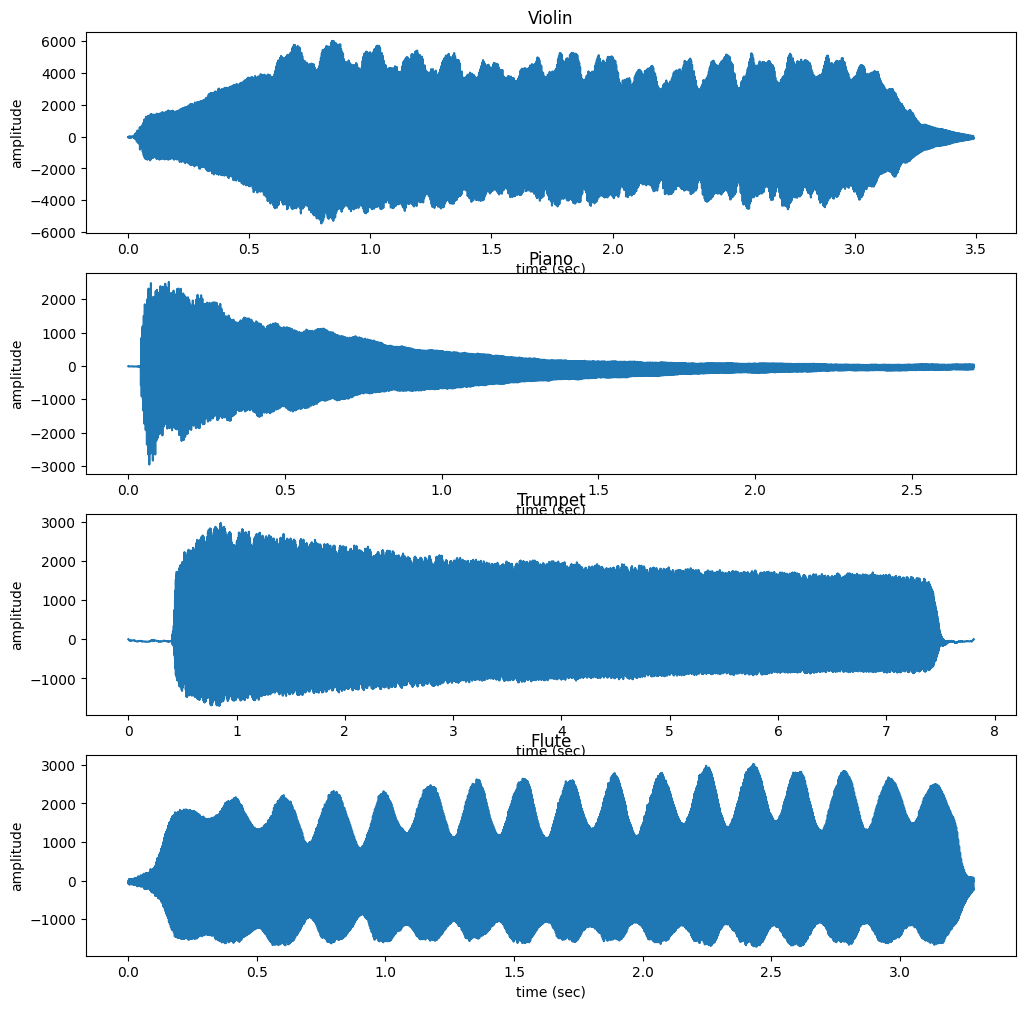

In [41]:
# plot the output from fft (plot power versus frequency) for all 4 instruments
plt.figure(figsize=(12,12))

plt.subplot(4,1,1)
plt.title('Violin')
plt.plot(tv_array,signalv)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,2)
plt.title('Piano')
plt.plot(tp_array,signalp)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,3)
plt.title('Trumpet')
plt.plot(tt_array,signalt)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

plt.subplot(4,1,4)
plt.title('Flute')
plt.plot(tf_array,signalf)
plt.xlabel("time (sec)")
plt.ylabel("amplitude")

### Add noise to a wav file

* Download a wav file from the web, make your own, or use one of the files we already downloaded.

* Read in the file and take the `fft`.

* Add noise to the data by setting one of the fourier coefficients to a non-zero value.

* Take the `ifft` to create a new sound file.

* Play the file with noise

```Audio(data=newsignal, rate=samplerate)```


In [43]:
sampleratev, signalv = wavfile.read('violinC4.wav')
new = fft(signalv)
len

38500

In [46]:
nnoise = 15000
randoms = np.random.randint(low=0,high=len(new),size=nnoise)
ampmax = 20000
amps = -ampmax + np.random.random(size=nnoise)*2*ampmax
Ynoise = new.copy()
Ynoise[randoms] = amps
newnoise = ifft(Ynoise)

In [47]:
Audio(data=newnoise, rate=sampleratev)

/usr/local/lib/python3.10/dist-packages/IPython/lib/display.py:159: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


In [48]:
samplerate, signal = wavfile.read('violinC4.wav')
Audio(data=signal, rate=samplerate)

### Using phyphox

Use phyphox to analyze the frequency spectrum of each wave and compare it to your results.